# Enunciado projeto 03

O objetivo deste projeto é construir um modelo preditivo capaz de calcular o preço de um imóvel no bairro Vila Nova Conceição na cidade de São Paulo.

Para completar este projeto cada aluno deverá seguir as orientações que estão neste notebook e preencher as células vazias.

Este projeto é individual. O link do notebook totalmente preenchido deverá ser submetido no black até o dia 30/10/2019.

# Aquisição, pré-processamento e análise descritiva

In [1]:
import pandas
import io
import requests

url = "https://media.githubusercontent.com/media/fbarth/ml-espm/master/data/20140917_imoveis_filtrados_final.csv_shaped.csv"
s = requests.get(url).content
df = pandas.read_csv(io.StringIO(s.decode('utf-8')), sep=",")

In [2]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


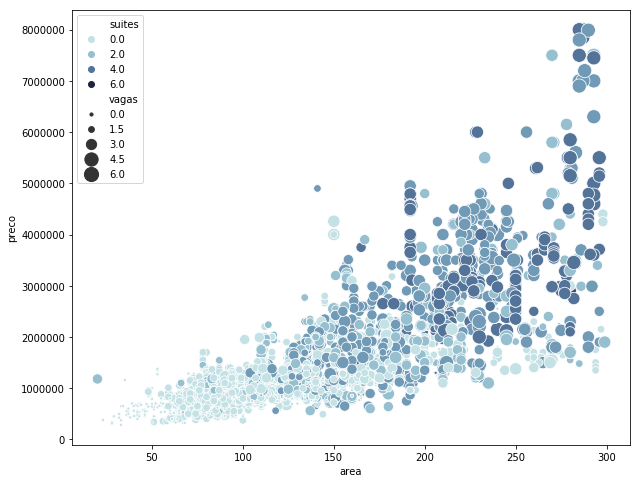

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

In [4]:
df['bairro'].value_counts()

vila-mariana           1714
paraiso                 809
vila-nova-conceicao     794
vila-sonia              314
perto_ibirapuera        129
Name: bairro, dtype: int64

- Considere apenas os imóveis do bairo vila-nova-conceicao

In [6]:
is_vnc = df.bairro == 'vila-nova-conceicao'
df = df.loc[is_vnc]

- Depois de considerar apenas os imóveis do bairro vila-nova-conceicao o tamanho do dataset precisa ser exatamente igual a:

In [7]:
df.shape

(794, 7)

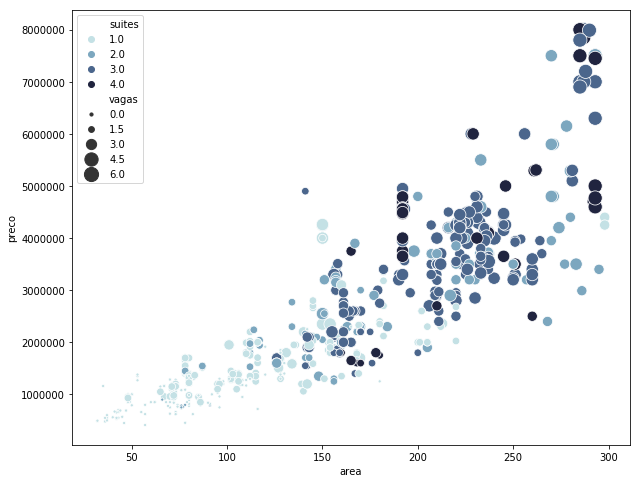

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

In [9]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


- A quantidade suites não pode ser maior que a quantidade de dormitórios e a quantidade de suites também não pode ser maior que a quantidade de banheiros. Exclua todos os exemplos que não satisfazem esta restrição. Estes exemplos provavelmente são erros de coleta de dados.

In [27]:
suites_maior_dormitorios = df.query('suites > dormitorios').index
suites_maior_banheiros = df.query('suites > banheiros').index

df = df.drop(suites_maior_dormitorios, axis=0)
df = df.drop(suites_maior_banheiros, axis=0)

- Depois deste filtro o dataset precisa ter o tamanho abaixo:

In [28]:
df.shape

(772, 7)

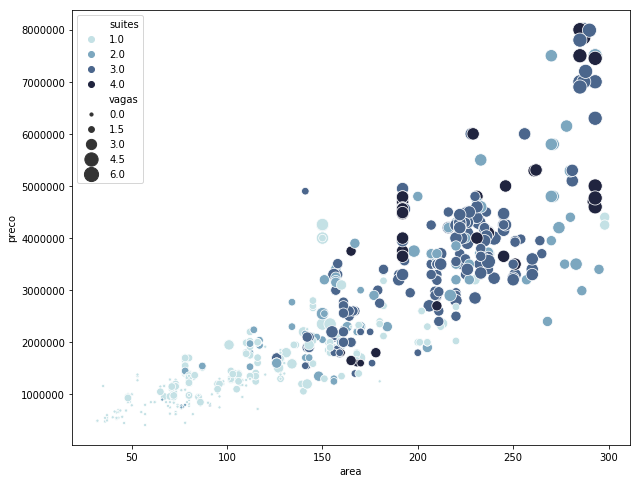

In [29]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

- Visto que agora a variável bairro tem apenas um valor, você deve remover a mesma

In [30]:
df = df.drop('bairro', axis=1)

- Depois deste filtro o dataset precisa ter a seguinte estrutura:

In [31]:
df.head()

,preco,area,suites,dormitorios,banheiros,vagas
0,490000.0,32.0,1.0,1.0,1.0,1.0
1,3180000.0,157.0,2.0,2.0,2.0,2.0
2,1900000.0,205.0,2.0,3.0,3.0,3.0
3,3565000.0,193.0,3.0,3.0,3.0,3.0
4,1605000.0,116.0,1.0,3.0,2.0,2.0


- Qual é o valor mínimo e máximo dos preços dos imóveis?

In [71]:
print('Valor mínimo:', df['preco'].min(), '\nValor máximo:', df['preco'].max())

Valor mínimo: 411500.0 
Valor máximo: 8000000.0


# Divisão dos datasets

In [78]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=4)

# Criação do modelo preditivo

Crie um modelo de regressão utilizando os algoritmos e transformações nos atributos que você considera mais adequados.

Descreva nas células abaixo todas as etapas necessárias para o desenvolvimento do modelo.

In [79]:
import numpy
from sklearn.linear_model import LinearRegression

# Validação do modelo

Valide o modelo desenvolvido considerando os datasets X_test e y_test. Espera-se que o erro médio absoluto seja inferior a duzentos mil reais (R$ 200.000,00).

Descreva nas células abaixo todas as etapas necessárias para a validação do modelo.

In [ ]:
# The code was removed by Watson Studio for sharing.